In [13]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from utils import load, plot_history, compose_alpha
from models import own_custom_conv_net, neuralmon_conv_net, smaller_VGGNet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def custom_CNN_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)),   
        
        layers.Conv2D(32, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(64, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 

        layers.Conv2D(128, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(150, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Flatten(), 
        layers.Dense(64, activation='relu'), 
        layers.Dense(18, activation='sigmoid'), 
    ])
    
    return model

In [42]:
train_dataset, val_dataset = load(csv="pokemon_image_dataset.csv", image_path="./images/pokemon_image_dataset")
train_dataset2, val_dataset2 = load(csv="synthetic_pokemon.csv", image_path="./images/synthetic_pokemon")
train_dataset3, val_dataset3 = load(csv="synthetic_pokemon_v2.csv", image_path="./images/synthetic_pokemon_v2")

[['Grass' 'Ice']
 ['Psychic' 'None']
 ['Dark' 'None']
 ...
 ['Poison' 'Flying']
 ['Dark' 'Dragon']
 ['Dragon' 'Ground']]
[[ 5 19]
 [ 6  1]
 [16  1]
 ...
 [ 8  4]
 [16 17]
 [17  9]]
[['Bug' 'None']
 ['Bug' 'None']
 ['Bug' 'None']
 ...
 ['Water' 'Steel']
 ['Water' 'Steel']
 ['Water' 'Steel']]
[[18 19]
 [18 19]
 [18 19]
 ...
 [ 1  2]
 [ 1  2]
 [ 1  2]]
[['Bug' 'None']
 ['Bug' 'None']
 ['Bug' 'None']
 ...
 ['Water' 'Steel']
 ['Water' 'Steel']
 ['Water' 'Steel']]
[[18 19]
 [18 19]
 [18 19]
 ...
 [ 1  2]
 [ 1  2]
 [ 1  2]]


In [16]:
histories = []

In [17]:
def compute_class_weights(dataset):
    # Initialize counters
    positive_counts = tf.zeros(18, dtype=tf.int32)
    total_samples = 0

    # Iterate over the dataset
    for _, labels in dataset:
        positive_counts += tf.reduce_sum(labels, axis=0)
        total_samples += tf.shape(labels)[0]

    # Convert to numpy for easier manipulation
    positive_counts = positive_counts.numpy()
    total_samples = total_samples.numpy()

    # Calculate class weights
    class_weights = {}
    for i in range(18):
        if positive_counts[i] > 0:
            class_weights[i] = (1 / positive_counts[i]) * (total_samples / 2.0)
        else:
            class_weights[i] = 1.0  # Assign a neutral weight if the class doesn't appear

    return class_weights

class_weights = compute_class_weights(train_dataset)
print(class_weights)

{0: 3.080952380952381, 1: 3.761627906976744, 2: 4.3133333333333335, 3: 4.147435897435897, 4: 4.431506849315069, 5: 5.391666666666667, 6: 6.47, 7: 6.882978723404255, 8: 6.739583333333333, 9: 7.032608695652174, 10: 7.3522727272727275, 11: 8.0875, 12: 7.890243902439025, 13: 8.0875, 14: 7.702380952380952, 15: 9.51470588235294, 16: 8.513157894736842, 17: 12.442307692307693}


In [18]:
model_BCLoss = custom_CNN_model((120,120,3))

model_BCLoss.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history1 = model_BCLoss.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history1)

Epoch 1/50


c:\Uni\Enhancing-Pokemon-Type-Recognition-with-Hybrid-Datasets\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - AUC: 0.5184 - Precision: 0.0914 - Recall: 0.2666 - accuracy: 0.0770 - loss: 0.6287 - val_AUC: 0.5407 - val_Precision: 0.1034 - val_Recall: 0.3254 - val_accuracy: 0.0741 - val_loss: 0.5796
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - AUC: 0.6019 - Precision: 0.2157 - Recall: 0.0293 - accuracy: 0.1580 - loss: 0.3078 - val_AUC: 0.5376 - val_Precision: 0.1229 - val_Recall: 0.0902 - val_accuracy: 0.0988 - val_loss: 0.3873
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - AUC: 0.6978 - Precision: 0.6548 - Recall: 0.0259 - accuracy: 0.2544 - loss: 0.2633 - val_AUC: 0.5629 - val_Precision: 0.1474 - val_Recall: 0.0588 - val_accuracy: 0.0926 - val_loss: 0.3524
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - AUC: 0.7797 - Precision: 0.7289 - Recall: 0.0507 - accuracy: 0.3549 - loss: 0.2412 - val_AUC: 0.6264 - val_Precision: 0.2087 - val_Recall: 0.1967 - val_accuracy: 0.1728 - val_loss: 0.4062
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 11

In [19]:
model_BCLoss_weighted = custom_CNN_model((120,120,3))

model_BCLoss_weighted.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history2 = model_BCLoss_weighted.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset,
    verbose = 1,
    class_weight=class_weights
)
histories.append(history2)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - AUC: 0.5295 - Precision: 0.1036 - Recall: 0.2529 - accuracy: 0.0843 - loss: 2.8482 - val_AUC: 0.5074 - val_Precision: 0.1148 - val_Recall: 0.0960 - val_accuracy: 0.0679 - val_loss: 0.4200
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - AUC: 0.6509 - Precision: 0.2379 - Recall: 0.0090 - accuracy: 0.2012 - loss: 1.4687 - val_AUC: 0.6014 - val_Precision: 0.1404 - val_Recall: 0.0339 - val_accuracy: 0.1914 - val_loss: 0.3180
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - AUC: 0.7609 - Precision: 0.6324 - Recall: 0.0291 - accuracy: 0.3004 - loss: 1.2954 - val_AUC: 0.6222 - val_Precision: 0.1796 - val_Recall: 0.1215 - val_accuracy: 0.1667 - val_loss: 0.4080
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - AUC: 0.8242 - Precision: 0.7913 - Recall: 0.0948 - accuracy: 0.4304 - loss: 1.1585 - val_AUC: 0.6882 - val_Precision: 0.2347 - val_Recall: 0.2675 - val_accuracy: 0.2593 - val_loss: 0.4310
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━

In [20]:
model_BCFLoss = custom_CNN_model((120,120,3))

model_BCFLoss.compile(optimizer='adam',
            loss='binary_focal_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history3 = model_BCFLoss.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history3)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - AUC: 0.5296 - Precision: 0.0863 - Recall: 0.1898 - accuracy: 0.0782 - loss: 0.1896 - val_AUC: 0.5265 - val_Precision: 0.2128 - val_Recall: 0.0412 - val_accuracy: 0.0802 - val_loss: 0.5131
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - AUC: 0.7091 - Precision: 0.4019 - Recall: 0.0942 - accuracy: 0.2163 - loss: 0.0764 - val_AUC: 0.5198 - val_Precision: 0.1654 - val_Recall: 0.1770 - val_accuracy: 0.1296 - val_loss: 0.2576
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - AUC: 0.8213 - Precision: 0.6868 - Recall: 0.1810 - accuracy: 0.3579 - loss: 0.0620 - val_AUC: 0.5812 - val_Precision: 0.1438 - val_Recall: 0.1818 - val_accuracy: 0.1173 - val_loss: 0.1380
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - AUC: 0.8849 - Precision: 0.7490 - Recall: 0.2033 - accuracy: 0.4547 - loss: 0.0528 - val_AUC: 0.6283 - val_Precision: 0.1497 - val_Recall: 0.1849 - val_accuracy: 0.1481 - val_loss: 0.1014
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━

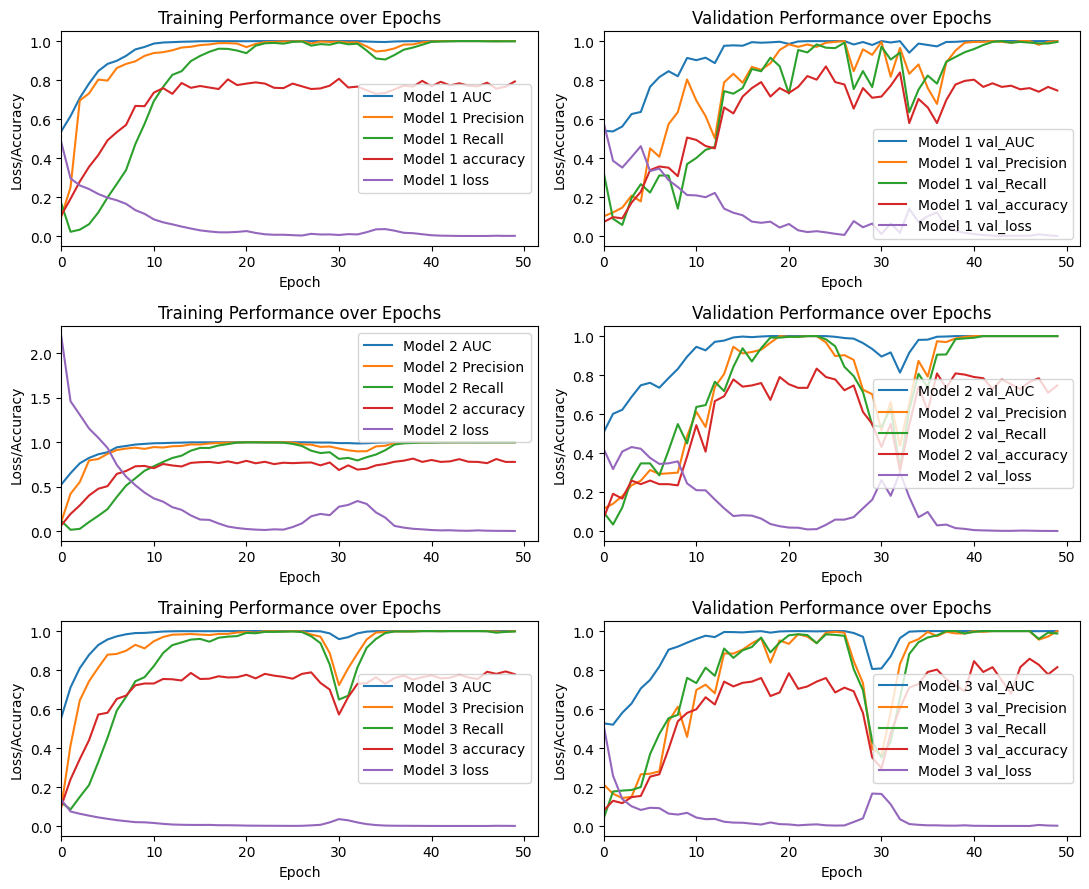

In [21]:
def plot_history(histories):
    # Create a figure with two subplots: one for loss, one for accuracy
    fig, axs = plt.subplots(len(histories), 2, figsize=(11, len(histories)*3))
    if len(histories) == 1:
        axs = [axs]
    for i, (history, (ax1, ax2)) in enumerate(zip(histories,axs)):
        # Iterate over each history and label to plot on the same figure
        # Plot all metrics included in the history object
        for key in history.history.keys():
            # check if the key includes "val" or not
            if 'val' in key:
                ax2.plot(history.history[key], label='Model '+str(i+1)+' '+key)
            else:
                ax1.plot(history.history[key], label='Model '+str(i+1)+' '+key)

        # Customize loss subplot
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss/Accuracy')
        ax1.set_title('Training Performance over Epochs')
        ax1.legend()
        ax1.set_xlim(left=0)  # Ensure the x-axis starts at 0

        # Customize accuracy subplot
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss/Accuracy')
        ax2.set_title('Validation Performance over Epochs')
        ax2.legend()
        ax2.set_xlim(left=0)  # Ensure the x-axis starts at 0
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
plot_history(histories)

In [39]:
for i, history in enumerate(histories):
    print("Max   training accuracy Model "+str(i+1)+" in Epoch", np.argmax(history.history['accuracy']), "with value", np.max(history.history['accuracy']))
    print("Max validation accuracy Model "+str(i+1)+" in Epoch", np.argmax(history.history['val_accuracy']), "with value", np.max(history.history['val_accuracy']))
    print()

Max   training accuracy Model 1 in Epoch 30 with value 0.8068006038665771
Max validation accuracy Model 1 in Epoch 24 with value 0.8703703880310059

Max   training accuracy Model 2 in Epoch 38 with value 0.8160741925239563
Max validation accuracy Model 2 in Epoch 23 with value 0.8333333134651184

Max   training accuracy Model 3 in Epoch 48 with value 0.7928902506828308
Max validation accuracy Model 3 in Epoch 46 with value 0.8580247163772583



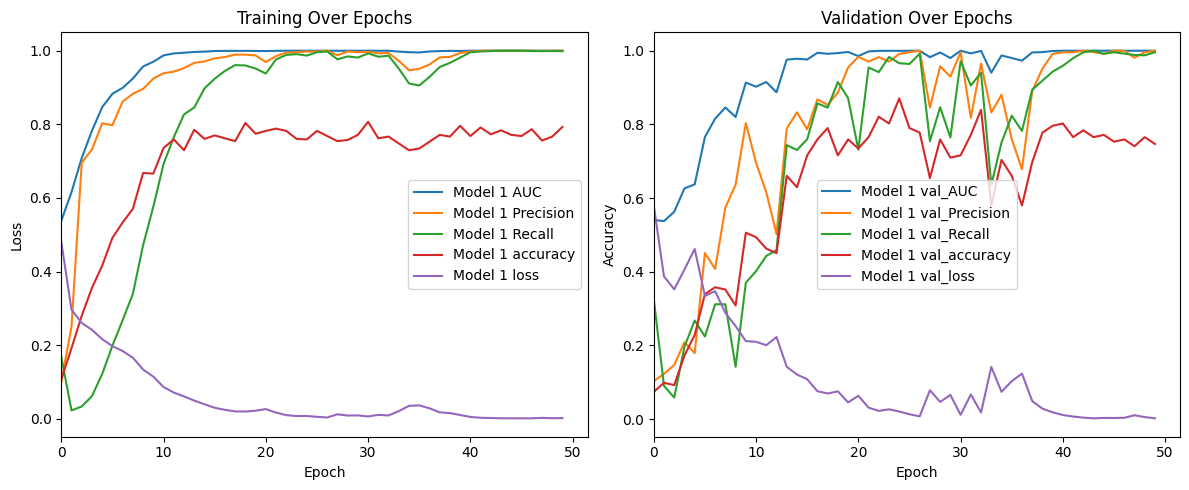

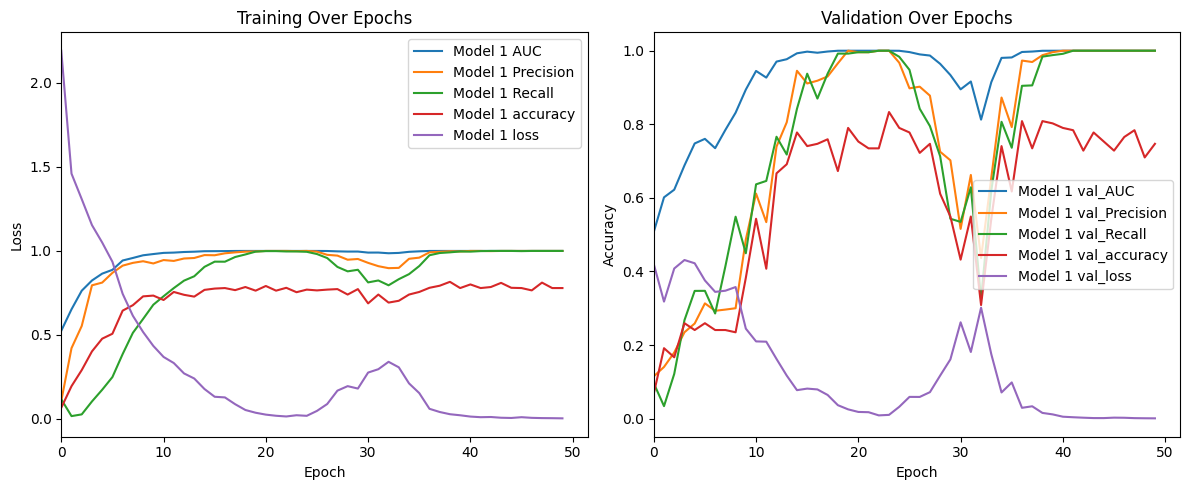

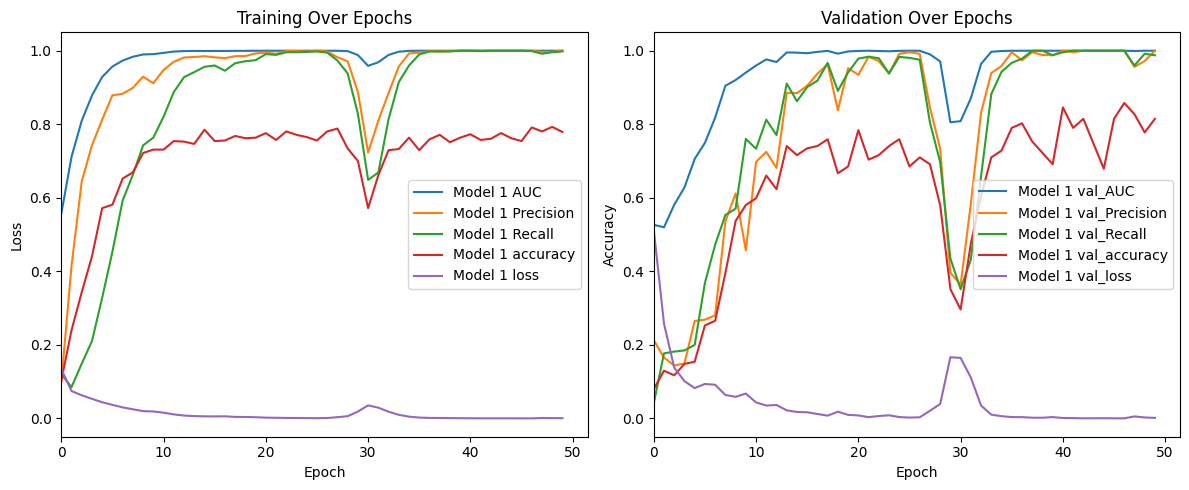

In [22]:
def plot_seperate_history(histories):
    # Create a figure with two subplots: one for loss, one for accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Iterate over each history and label to plot on the same figure
    for i, history in enumerate(histories):
        
        # Plot all metrics included in the history object
        for key in history.history.keys():
            # check if the key includes "val" or not
            if 'val' in key:
                ax2.plot(history.history[key], label='Model '+str(i+1)+' '+key)
            else:
                ax1.plot(history.history[key], label='Model '+str(i+1)+' '+key)

    # Customize loss subplot
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Over Epochs')
    ax1.legend()
    ax1.set_xlim(left=0)  # Ensure the x-axis starts at 0

    # Customize accuracy subplot
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Validation Over Epochs')
    ax2.legend()
    ax2.set_xlim(left=0)  # Ensure the x-axis starts at 0

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
for history in histories:
    plot_seperate_history([history])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
tf.Tensor([0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0], shape=(18,), dtype=int32)
[0.    0.    0.007 0.079 0.    1.    0.    0.    0.    0.    0.998 0.
 0.    0.    0.    0.    0.    0.   ]
(120, 120, 3)
Accuracy:  [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1

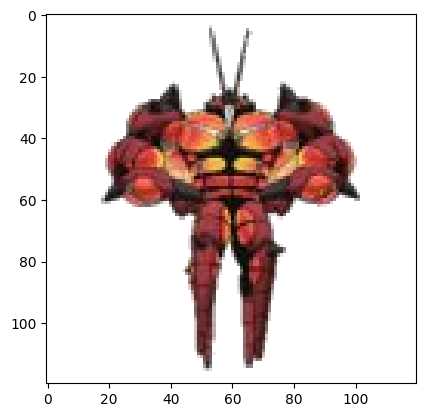

In [23]:
for sample in val_dataset:
    pred = model_BCLoss.predict(sample[0])
    pred = model_BCLoss(sample[0], training=False)
    print(sample[1][0])
    print(np.around(pred[0], decimals=3))
    img = sample[0][0].numpy()
    print(img.shape)
    # print tensorflow accuracy of the prediction
    print("Accuracy: ", tf.keras.metrics.binary_accuracy(sample[1], pred).numpy())

    plt.imshow(img, interpolation='nearest')
    plt.show()
    break